<a id='intro'></a>

# Coincidencia de columnas desordenadas de Pandas con FuzzyWuzzy



![header](https://github.com/mbenaventc/FuzzyWuzzyLinkedin/tree/master/datos/pandasWeb.jpg)

En este notebook le mostraré cómo usar el paquete FuzzyWuzzy de Python para identificar coindidencias de  dos columnas de un dos dataset de Pandas utilizando la función de la similitud de cadenas que nos aporta la liibrería FuzzyWuzzy.

El resultado que deseamos obtener es que cada uno de los valores de la columna A del primer dataset coincida con el valor correspondiente más cercano en la columna B del segundo dataset, entiendo como valor más cercano aquel que **a nivel probabilistico** es más probable en función del diseño del algoritmos utilizado. 


Para hacerlo he utilizado datos ficticios por lo que deberías poder adaptar esta pequeña utilizad al marco corporativo o empresarial al que desees aplicarlo  si finalmente decides que puede aportar automatización a tu proyecto.


Ahora, antes de abordar nuestro pequeño problema, esto es lo que puede esperar de este artículo:

    Casi a diario cualquier analista de datos suele trabajar con fuentes de datos muy heterogeneas en los que se encuentra  que la misma entidad a analizar (unidad de negocio, país, provincia, dirección, número de teléfono, email ,suscripcinoes, etc) se escribe de forma distinta en las distintas fuentes , bien por la normalización heredada de las fuentes de origen durante migraciones de datos , por  errores de tipeado manual en las introduccion de los datos cuando estos no están referenciados a tablas o incluso cuando estan enumarados en listas que se han construido sin prever ninguna normalización. 
     
    En este artículo, vamos a trabajar en hacer coincidir los nombres completos de vías de un municipio extraidos desde el catrasto con peticiones request con con las direcciones de pisos en venta que tiene un portl inmobiliario para la misma población de estudio. Sin embargo, podrías aplicar las mismas técnicas para cualquier problema de coincidencia de cadenas que encuentre (la cadena es solo texto, en pocas palabras);

    Les dejaré este Jupyter Notebook en mi mi repositorio de Github para que podáis descargar el código y los datos y puedan optimizarlo según el caso de uso.

    No será necesiario conocimientos amplios de Python, pero si sería deseable que estén familiarizdos con Pandas y Matplotlib  para el analisis de datos, además de conocer las estructuras de datos siguientes : Listas, diccionarios y series.


     


# Instalación de paquetes utilizados



En primer lugar, importamos la libreria de Pandas :

In [274]:
import pandas as pd

Será necesario que tengas instalado para poder utilizar esta utilizar el paquete $FuzzyWuzzy$ y algunos de sus modulos.


Puedes instalarlo con $pip$ desde este Jupyter Notebook --$pip  install fuzzywuzzy$' ---   o también puedes instalarlo desde la consola de Anaconda si estas utilizando estra distribución. 

Debes instalarlo como `pip install fuzzywuzzy` y posteriormentte instalar la utilidad para usar el algoritmo de $Levenshtein$ como  `$pip install python-Levenshtein$` 


In [275]:
from fuzzywuzzy import process, fuzz

La parte de visualización la abordaremos con  `matplotlib`.

In [276]:
import matplotlib.pyplot as plt

Trataremos de configurar una clase CSS para que la visualizacion de datos de los dataset sea un poco más estética.

In [277]:
%%HTML
<style>.dataframe th, td:first-child{background:#3f577c;font-family:monospace;color:white;border:3px solid white;
text-align:left !important;}#codex{float:right;}</style>


In [278]:
th_props = [('background','#3f577c'), ('font-family','monospace'), ('color','green'),('border','3px solid white'),
            ('text-align','left !important')]
styles = [dict(selector="th", props=th_props)]

Utilizaremos para este proyecto dos dataframes para realizar los matches :

* `cvias` contiene los datos de todas las vías de un municipio de Castilla la Mancha - Fuente de datos Castatro.  
* `tvias` contiene las direcciones de las viviendas en venta  - $anonimizado$  - que ha registrado un portal inmobiliario en una base de datos en los que la dirección ha sido tipeada manualmente.


Los dataset se encuentran en la carpeta datos del repositorio de Github que os anexo. 

Asegurate de cambiar los path a los que tengas establecidos en tu repositorio local de los ficheros
'datos/cvias.xlsx' y 'datos/tvias.xlsx'

[Github repository](https://github.com/mbenaventc/FuzzyWuzzyLinkedin)


# LOS DATOS

Los datos los cargaremos de los dos dataset que habíamos indicando anteriormente.

In [279]:
cvias = pd.read_excel('datos/cvias.xlsx')
tvias=pd.read_excel('datos/tvias.xlsx')


In [280]:
# Obtendremos una muestra de 10 filas de las calles enumardas en el castrasto.
     
cvias.head(10)

,CP,CM,CV,TV,NOMBRE_VIA
0,13,71,819,CL,FERRAZ - VILLAR
1,13,71,722,CL,SAN MIGUEL - VILLAR
2,13,71,860,TR,1 PINO
3,13,71,973,CL,5-SECTOR III
4,13,71,1,CL,ABAJO
5,13,71,901,PZ,ABENOJAR
6,13,71,145,CL,ADUANA
7,13,71,3,CL,AGUILERA
8,13,71,4,CL,AGUSTINA DE ARAGON
9,13,71,5,CL,ALAMEDA


In [281]:
# Obtendremos una muestra de 5 filas de las direcciones de los pisos en venta
    
tvias.head(5)

,id_vivienda,Direccion
0,1,Ave Maria
1,2,ANCHA
2,3,Ancha
3,4,Peru
4,6,M. Auxiliadora


# El problema :

Antes de explorar  la magia de `FuzzyWuzzy`  me gustaría explorar una solución a este problema que inicialmente podría realizase con una simple hoja de cálculo .La idea es:

1. Comparar la columna NOMBRE_VIA del fichero de vías del catastro tienen alguna correspondencia $exacta$ con la columna $Direccion$ del fichero de cvias que está usando el portal inmobiliario para registrar las direcciones.


2. Compararemos ambos valores , siendo  **Verdadero** si hay correspondencia exacta y un valor de **Falso** si no existe. . Los valores Verdadero y Falso se almacenarán en una columna llamada `EXISTE`.

In [282]:
# Crearemos una nueva columna y usarios una función lambda.

tvias['EXISTE'] = tvias.apply(lambda x: x.Direccion in list(cvias.NOMBRE_VIA), axis=1)


In [283]:
tvias.head(10)


,id_vivienda,Direccion,EXISTE
0,1,Ave Maria,False
1,2,ANCHA,True
2,3,Ancha,False
3,4,Peru,False
4,6,M. Auxiliadora,False
5,17,Calle Alamillo,False
6,18,Isabel la Catolica Salesianos,False
7,19,Alzazar,False
8,20,Calle Oriente,False
9,21,C. Albacete,False


### ¿Cuantos valores hubiesemos conseguido cruzar con este método?

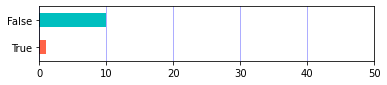

In [284]:
ax = tvias.EXISTE.value_counts().sort_values().plot(kind='barh', color=['tomato', 'c'], figsize=(6,1), width=0.5)
plt.xlim(0,50), plt.xticks(fontsize=10), ax.set_frame_on(True), plt.grid(color='blue', alpha=.4, axis='x') ;

Solo **1 valor** frente a los  **9 que no los ha localizado** (un ratio de 10 %). 

Si bien es cierto que con un tratamiento de cadena de texto convirtiendo todo a mayusculas, etc, hubise garantizado un cruce y un ratio un poco mayor pero no hubiese solucionado nada que no se hubiese podido solucionar utilizando la función de excel $Igual (A1,B1)$  para comparar cadenas.


In [285]:
# Creamos una copia de los dataset originales para utilizarlos al final delproceso.
tvias2=tvias
cvias2=cvias


# INTRODUCCION A FUZZYWUZZY

Comenzaremos con una introducción básica a `FuzzyWuzzy`. 

Este ingenioso paquete compara dos cadenas A y B y genera una relación que estima la distancia entre ellas. Estamos hablando de la **distancia de Levenshtein**, que es la distancia entre A y B en términos de cuántos cambios tenemos que hacer en la cadena A para transformarla en la cadena B. 

Los cambios incluyen eliminar, agregar o sustitución de caracteres. Cuantos menos cambios tengamos que hacer, más similares serán A y B, lo que da como resultado una relación más alta.

El principio de este notebook si recuerdas importamos tanto `fuzz` como `process` del paquete `FuzzWuzzy`. 

Estos son los dos módulos principales que vamos a utilizar en este artículo:


>* **fuzz.ratio**: compara dos cadenas y genera una relación. Por ejemplo:
fuzz.ratio( "¡Afuera hace sol!", "Afuera hace mucho sol")<br>
Similitud: 38

>* **process.extract**: toma una cadena A y luego busca las mejores coincidencias para ella en una lista de cadenas, luego devuelve estas cadenas junto con sus proporciones (con el parámetro de límite le indicamos al módulo cuántas cadenas similares quiere volver). Por ejemplo: <br><br>
lista_de_cadenas = ['a', 'ab', 'c', 'cd'] <br>
proceso.extract( 'aaa', lista_de_cadenas, límite=2 ) <br>
Similitud: [('a', 90), ('ab', 45)]

# APLICANDO FUZZYWUZZY 

En nuestro caso como exponíamos anteriormente en este notebook  queremos comparar cada NOMBRE_VIA de la base de datos de la inmobiliaria definido en la columna `t.direccion ` con todAs las vias que se encuentraN registradas en el catrasto que estan  en la columna `cvias.NOMBRE_via`.

Inicialmente usaremos **process.extract** para comparar ambas columnas.

Para ello utilizaremos listas para ir registrando para cada una de las viviendas el nombre de la calle y el valor de similitud. Utilizaremos un bucle for para ir recorriendo el dataset.


In [286]:
calle_probable = []
probabilidad = []

for i in tvias.Direccion:
        ratio = process.extract( i, cvias.NOMBRE_VIA, limit=1)
        calle_probable.append(ratio[0][0])
        probabilidad.append(ratio[0][1])


In [287]:

tvias['calle_problable'] = pd.Series(calle_probable)
tvias['similitud'] = pd.Series(probabilidad)

tvias.head(15)

,id_vivienda,Direccion,EXISTE,calle_problable,similitud
0,1,Ave Maria,False,AVE MARIA,100
1,2,ANCHA,True,ANCHA,100
2,3,Ancha,False,ANCHA,100
3,4,Peru,False,PERU,100
4,6,M. Auxiliadora,False,MARIA AUXILIADORA,87
5,17,Calle Alamillo,False,ALAMILLO,90
6,18,Isabel la Catolica Salesianos,False,ISABEL LA CATOLICA,90
7,19,Alzazar,False,ALCAZAR,86
8,20,Calle Oriente,False,ORIENTE,90
9,21,C. Albacete,False,ALBACETE,95


¡ Fuzzy Wizard ha hecho su magia! Ahora simplifiquemos este dataset resultado conservando solo las columnas `Direccion`, `calle_probable` y `similitud` con el objetivo de tener datos claros. 

Llamémoslo `resultado_final`: <br>



In [289]:
resultado_final = tvias[['Direccion', 'calle_problable', 'similitud']]
resultado_final.head(5)

,Direccion,calle_problable,similitud
0,Ave Maria,AVE MARIA,100
1,ANCHA,ANCHA,100
2,Ancha,ANCHA,100
3,Peru,PERU,100
4,M. Auxiliadora,MARIA AUXILIADORA,87


# AUDITANDO LOS RESULTADOS

El resultado de Fuzzy nos parta gran valor,  pero ¿cómo podemos asegurarnos de que cada direccion del portal tenga asociada para una correcta normalización el nombre correcta de al vía tal y como se define en el cartasto? 

Una buena manera de hacerlo es formatear dataset $resultado_final$  para que las proporciones bajas sean más fáciles de detectar e inspeccionar usando un mapa de colores. 

En nuestro caso, vamos a utilizar el mapa de colores de verano invertido `summer_r` donde las proporciones altas se colorean de verde y las proporciones bajas toman el color amarillo. El parametro de entrada que nos servirá para construir el mapa es de simulitud que proporciona el valor probabilistico.
Podréis 

In [291]:
resultado_final.head(10).style.background_gradient(subset='similitud', cmap='summer_r') \
                    .set_table_styles(styles)

,Direccion,calle_problable,similitud
0,Ave Maria,AVE MARIA,100
1,ANCHA,ANCHA,100
2,Ancha,ANCHA,100
3,Peru,PERU,100
4,M. Auxiliadora,MARIA AUXILIADORA,87
5,Calle Alamillo,ALAMILLO,90
6,Isabel la Catolica Salesianos,ISABEL LA CATOLICA,90
7,Alzazar,ALCAZAR,86
8,Calle Oriente,ORIENTE,90
9,C. Albacete,ALBACETE,95


Además de esto, podemos ordenar dataset `resultado_final` por `similitud` y luego inspeccionar las proporciones bajas (ojo, tenga en cuenta que una proporción alta no significa que la coincidencia sea correcta. Lo contrario también es cierto).
Lo ordenaremos de forma ascendente.

In [293]:
resultado_final.sort_values(by='similitud').head(8)

,Direccion,calle_problable,similitud
7,Alzazar,ALCAZAR,86
4,M. Auxiliadora,MARIA AUXILIADORA,87
5,Calle Alamillo,ALAMILLO,90
6,Isabel la Catolica Salesianos,ISABEL LA CATOLICA,90
8,Calle Oriente,ORIENTE,90
10,Almadén,ALMADEN,92
9,C. Albacete,ALBACETE,95
0,Ave Maria,AVE MARIA,100



El proceso anterior podría haber cometido algunos errores y/o incrementar a nivel probabilistico la tasa de acierto.

Para esto hay otros  **métodos** que `FuzzyWuzzy` podría usar para generar una relación al comparar dos cadenas. 

Y sí, como hemos visto antes, `FuzzyWuzzy` tiene muchos métodos diferentes entre los que puede elegir según el tipo de datos con los que esté trabajando. Aquí hay una lista de los mejores métodos, alguno de los cuales utilizaremos.


* fuzz.proporción
* fuzz.partial_ratio
* fuzz.token_set_ratio
* fuzz.token_sort_ratio
* fuzz.partial_token_set_ratio
* fuzz.partial_token_sort_ratio
* **Fuzz.WRatio**
* fuzz.QRatio
* fuzz.UWRatio
* fuzz.UQRatio

El que se usa por defecto  es `fuzz.WRatio`. Si desea usar otro `método`  simplemente deberemos pasarlo como argumento

`proporción = proceso.extraer(columna_A, columna_B, límite=1, anotador=fuzz.proporción)`

A continuación, probaremos algunos de estos métodos para ver cuál funciona perfectamente en nuestro caso de comparar direccioones. ¡Las previs para conseguir un  éxito del 100%!



# La búsqueda del método de FuzzyWuzzy perfecto:



Veamos todos los métodos `FuzzyWuzzy` que podemos usar. 


>* fuzz.proporción (R)
>* fuzz.proporción_parcial (PR)
>* fuzz.token_set_ratio (TSeR)
>* fuzz.token_sort_ratio (TSoR)
>* fuzz.partial_token_set_ratio (PTSeR)
>* fuzz.partial_token_sort_ratio (PTsoR)
>* fuzz.WRatio (WR)
>* fuzz.QRatio (QR)
>* fuzz.UWRatio (UWR)
>* fuzz.UQRatio (UQR)

Para el caso de comparación de direcciones, el método que mejor rendimiento creo que nos puede ofrecer es el  **fuzz.token_set_ratio (TSeR)** no solo porque dio la proporción más alta a la dirección correcta, sino porque la diferencia entre las proporciones de la dirección correcta y la dirección incorrecta más cercana se minimizará.

En cualquier caso, os llevará algún tiempo dominizar el uso de `FuzzyWuzzy` y algo de experimientación para advertir y decir el mejor método que podéis utilizar para hacer coincidir las cadenas.

Probaremos de nuevo con **fuzz.token_set_ratio (TSeR)* para analizar los resultados aunque definiremos una función que reciba un valor del  diccionario definido scorer_dict


In [229]:
scorer_dict = { 'R':fuzz.ratio, 'PR': fuzz.partial_ratio, 'TSeR': fuzz.token_set_ratio, 'TSoR': fuzz.token_sort_ratio,
                'PTSeR': fuzz.partial_token_set_ratio, 'PTSoR': fuzz.partial_token_sort_ratio, 'WR': fuzz.WRatio, 
                'QR': fuzz.QRatio, 'UWR': fuzz.UWRatio, 'UQR': fuzz.UQRatio }

In [299]:
def scorer_tester_function(x: dict,list: tvias2) :
        calle_probable = []
        probabilidad = []
        otras = []
        for i in tvias2.Direccion:
                ratio = process.extract( i, cvias2.NOMBRE_VIA,limit=2, scorer=scorer_dict[x])
                actual_email.append( ratio[0][0] )
                similarity.append( ratio[0][1] )
                calle_probable.append(ratio[0][0])
                probabilidad.append(ratio[0][2])       
                otras.append(ratio[0][2])  
        tvias2['calle_problable'] = pd.Series(calle_probable)
        tvias2['similitud'] = pd.Series(probabilidad)
        return tvias2

In [302]:
scorer_tester_function('PR',tvias)


,id_vivienda,Direccion,EXISTE,calle_problable,similitud,otras
0,1,Ave Maria,False,AVE MARIA,82,82
1,2,ANCHA,True,ANCHA,50,50
2,3,Ancha,False,ANCHA,50,50
3,4,Peru,False,PERU,568,568
4,6,M. Auxiliadora,False,O,526,526
5,17,Calle Alamillo,False,ALAMILLO,10,10
6,18,Isabel la Catolica Salesianos,False,ISABEL LA CATOLICA,384,384
7,19,Alzazar,False,ALCAZAR,19,19
8,20,Calle Oriente,False,O,526,526
9,21,C. Albacete,False,ALBACETE,14,14


Si quereis comprobar los resultados de toda la comparativa, podéis pasar el dataframe a un excel y así garantizais una inspección más adecuada

tvias2.to_excel('datos/Listado_Resultados.xlsx')